# Social Networks

Social networks are likely the instantiation of a network that you are all familiar with. A decade ago, this concept was not nearly as prevalent and was entrancing and intoxicating when you would come across it (ask anyone who watched the first season of The Wire in 2002). With the advent of Facebook, Twitter, and LinkedIn (where the network is explicit, easily accessed, roughly shown to you) social networks appear *obvious*. However, there is much to be done to understand these networks so that we can understand them at a deeper level. 

Importantly, Social Networks differ from other networks, such as transportation networks, in that they exhibit two properties:

(i) nodes are very *close* to each other
(ii) the entire network is very *small* (it is generally quick to navigate from one side to the other)

As a demonstration of this, let's examine `soc-hamsterster.edges` which is a  social network from the hamsterster website (a virtual habitat for hamsters and gerbils! i.e. the owners who impersonate them). 



In [11]:
import networkx as nx
hamsterster = nx.read_edgelist('../Data/soc-hamsterster.edges', comments = '%')

In [12]:
hamsterster.number_of_nodes(), hamsterster.number_of_edges()

(2426, 16630)

In [13]:
nx.average_clustering(hamsterster)

0.5375333362074084

In [14]:
nx.average_shortest_path_length( list(nx.connected_component_subgraphs(hamsterster))[0] )

3.5889954977488743

These two properties are, on the face, at odds with each other. **Why?**

# Small worlds

This week we read D.J. Watts and S.H. Strogatz. (1998). Collective dynamics of 'small-world' networks. Nature 393, 440-442. What was the main insight of this paper? 

We can actually reproduce these findings use the instantiation of the Watts-Strogatz model in networkx

In [16]:
#Exercise


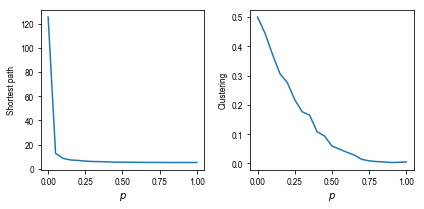

In [30]:
#Answer
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xdata, pathdata, clusterdata = [], [], []

for p in np.linspace(0, 1.0, 21):
    temp = nx.watts_strogatz_graph(1000, 5, p)
    xdata.append(p)
    pathdata.append( nx.average_shortest_path_length(temp) )
    clusterdata.append( nx.average_clustering(temp) )

fig = plt.figure(figsize = (6, 3))
ax = fig.add_subplot(121)
ax.plot(xdata, pathdata)
ax.set_xlabel('$p$')
ax.set_ylabel('Shortest path')
ax = fig.add_subplot(122)
ax.plot(xdata, clusterdata)
ax.set_xlabel('$p$')
ax.set_ylabel('Clustering')
plt.tight_layout()

What's amazing, and frequently occurs in networks, is that the shortest path length effectively 'falls' off a cliff (reducing 10 fold) just with a minor change to $p$. We can see that it stabilizes quickly.

Clustering has a more gradual decline, since most edges are not actually changed. 

Given that social networks typically have a "high" (in respect to other types of networks) average clustering, we can see that there is a *sweet spot* of randomization from a highly structured graph where they are likely to exist. Surprisingly, it takes very little randomization from a fully structured graph to achieve this point. 

In [31]:
pathdata

[125.37537537537537,
 12.920954954954954,
 8.774900900900901,
 7.4444304304304305,
 7.043841841841842,
 6.457097097097097,
 6.1511151151151156,
 6.048858858858859,
 5.813981981981982,
 5.636650650650651,
 5.562354354354355,
 5.528410410410411,
 5.475417417417417,
 5.43751951951952,
 5.376876876876877,
 5.377227227227227,
 5.329119119119119,
 5.3047047047047045,
 5.339049049049049,
 5.325213213213213,
 5.331545545545546]